# Module 3: Data Exploration

The following tutorial contains examples of Python code for data exploration. You should refer to the "Data Exploration" chapter of the "Introduction to Data Mining" book (available at https://www-users.cs.umn.edu/~kumar001/dmbook/index.php) to understand some of the concepts introduced in this tutorial notebook. The notebook can be downloaded from http://www.cse.msu.edu/~ptan/dmbook/tutorials/tutorial3/tutorial3.ipynb.

Data exploration refers to the preliminary investigation of data in order
to better understand its specific characteristics. There are two key motivations for data exploration:
1. To help users select the appropriate preprocessing and data analysis technique used.
2. To make use of humans’ abilities to recognize patterns in the data.

Read the step-by-step instructions below carefully. To execute the code, click on the cell and press the SHIFT-ENTER keys simultaneously.

## 3.1. Summary Statistics

Summary statistics are quantities, such as the mean and standard deviation, that capture various characteristics of a potentially large set of values with a single number or a small set of numbers. In this tutorial, we will use the Iris sample data, which contains information on 150 Iris flowers, 50 each from one of three Iris species: Setosa, Versicolour, and Virginica. Each flower is characterized by five attributes:

- sepal length in centimeters

- sepal width in centimeters

- petal length in centimeters

- petal width in centimeters

- class (Setosa, Versicolour, Virginica) 

In this tutorial, you will learn how to:

- Load a CSV data file into a Pandas DataFrame object.

- Compute various summary statistics from the DataFrame.

To execute the sample program shown here, make sure you have installed the Pandas library (see Module 2).

**1.** First, you need to download the <a href="http://archive.ics.uci.edu/ml/datasets/Iris">Iris dataset</a> from the UCI machine learning repository.

**<font color='red'>Code:</font>** The following code uses Pandas to read the CSV file and store them in a DataFrame object named data. Next, it will display the first five rows of the data frame.

In [7]:
import pandas as pd

data = pd.read_csv('iris.csv')
data.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'class']

data.head()

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


**2.** For each quantitative attribute, calculate its average, standard deviation, minimum, and maximum values.

**<font color="red">Code:</font>**

In [8]:
from pandas.api.types import is_numeric_dtype

for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

sepal length:
	 Mean = 5.84
	 Standard deviation = 0.83
	 Minimum = 4.30
	 Maximum = 7.90
sepal width:
	 Mean = 3.06
	 Standard deviation = 0.44
	 Minimum = 2.00
	 Maximum = 4.40
petal length:
	 Mean = 3.76
	 Standard deviation = 1.77
	 Minimum = 1.00
	 Maximum = 6.90
petal width:
	 Mean = 1.20
	 Standard deviation = 0.76
	 Minimum = 0.10
	 Maximum = 2.50


**3.** For the qualitative attribute (class), count the frequency for each of its distinct values.

**<font color="red">Code:</font>**

In [9]:
data['class'].value_counts()

Virginica     50
Versicolor    50
Setosa        50
Name: class, dtype: int64

**4.** It is also possible to display the summary for all the attributes simultaneously in a table using the describe() function. If an attribute is quantitative, it will display its mean, standard deviation and various quantiles (including minimum, median, and maximum) values. If an attribute is qualitative, it will display its number of unique values and the top (most frequent) values. 

**<font color="red">Code:</font>**

In [10]:
data.describe(include='all')

,sepal length,sepal width,petal length,petal width,class
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,Virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


Note that count refers to the number of non-missing values for each attribute.

**5.** For multivariate statistics, you can compute the covariance and correlation between pairs of attributes.

**<font color="red">Code:</font>**

In [11]:
print('Covariance:')
data.cov()

Covariance:


,sepal length,sepal width,petal length,petal width
sepal length,0.685694,-0.042434,1.274315,0.516271
sepal width,-0.042434,0.189979,-0.329656,-0.121639
petal length,1.274315,-0.329656,3.116278,1.295609
petal width,0.516271,-0.121639,1.295609,0.581006


In [12]:
print('Correlation:')
data.corr()

Correlation:


,sepal length,sepal width,petal length,petal width
sepal length,1.000000,-0.117570,0.871754,0.817941
sepal width,-0.117570,1.000000,-0.428440,-0.366126
petal length,0.871754,-0.428440,1.000000,0.962865
petal width,0.817941,-0.366126,0.962865,1.000000


## 3.2. Data Visualization

Data visualization is the display of information in a graphic or tabular format. Successful visualization requires that the data (information) be converted into a visual format so that the characteristics of the data and the relationships
among data items or attributes can be analyzed or reported.

In this tutorial, you will learn how to display the Iris data created in Section 3.1. To execute the sample program shown here, make sure you have installed the matplotlib library package (see Module 0 on how to install Python packages).

**1.** First, we will display the histogram for the sepal length attribute by discretizing it into 8 separate bins and counting the frequency for each bin.

**<font color="red">Code:</font>**

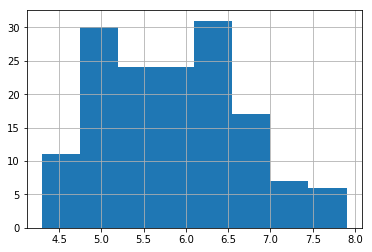

In [13]:
%matplotlib inline

data['sepal length'].hist(bins=8)

**2.** A boxplot can also be used to show the distribution of values for each attribute.

**<font color="red">Code:</font>**

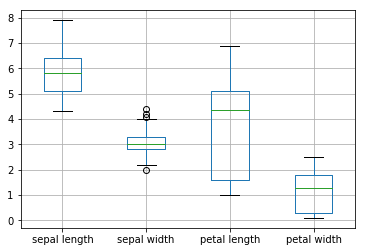

In [14]:
data.boxplot()

**3.** For each pair of attributes, we can use a scatter plot to visualize their joint distribution.

**<font color="red">Code:</font>**

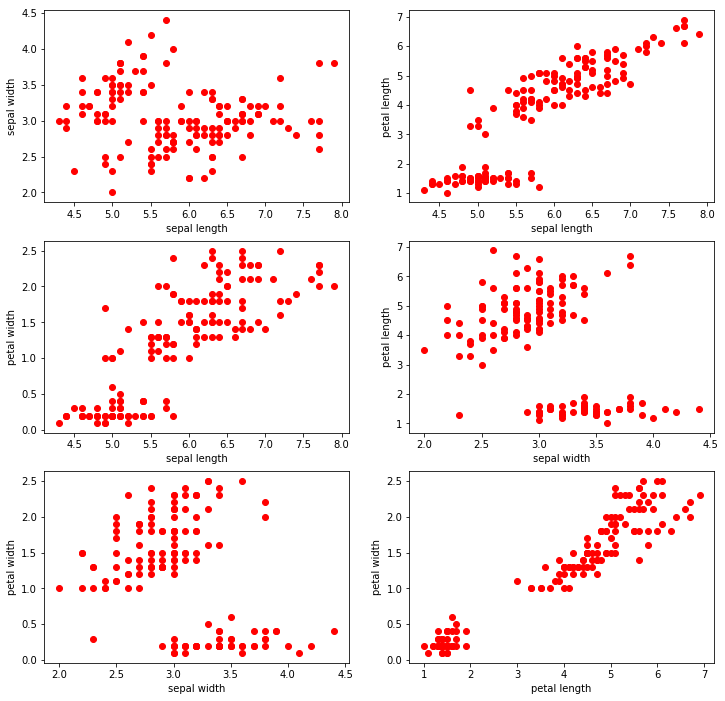

In [15]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(3, 2, figsize=(12,12))
index = 0
for i in range(3):
    for j in range(i+1,4):
        ax1 = int(index/2)
        ax2 = index % 2
        axes[ax1][ax2].scatter(data[data.columns[i]], data[data.columns[j]], color='red')
        axes[ax1][ax2].set_xlabel(data.columns[i])
        axes[ax1][ax2].set_ylabel(data.columns[j])
        index = index + 1

**4.** Parallel coordinates can be used to display all the data points simultaneously. Parallel coordinates have one coordinate axis for each attribute, but the different axes are parallel to one other instead of perpendicular, as is traditional. Furthermore, an object is represented as a line instead of as a point. In the example below, the distribution of values for each class can be identified in a separate color.

**<font color="red">Code:</font>**

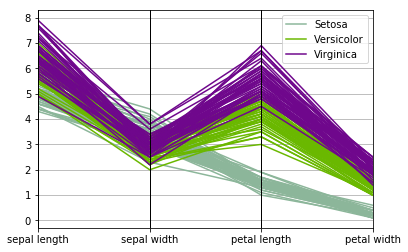

In [16]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(data, 'class')

## 3.3. Summary

This tutorial presents several examples for data exploration and visualization using the Pandas and matplotlib library packages available in Python. 

**<font color='blue'>References:</font>**

1. Documentation on Pandas. https://pandas.pydata.org/
2. Documentation on matplotlib. https://matplotlib.org/
3. Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science. 